### Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('winequality-red.csv')

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.shape

(1599, 12)

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### let's see how data is distributed for every column

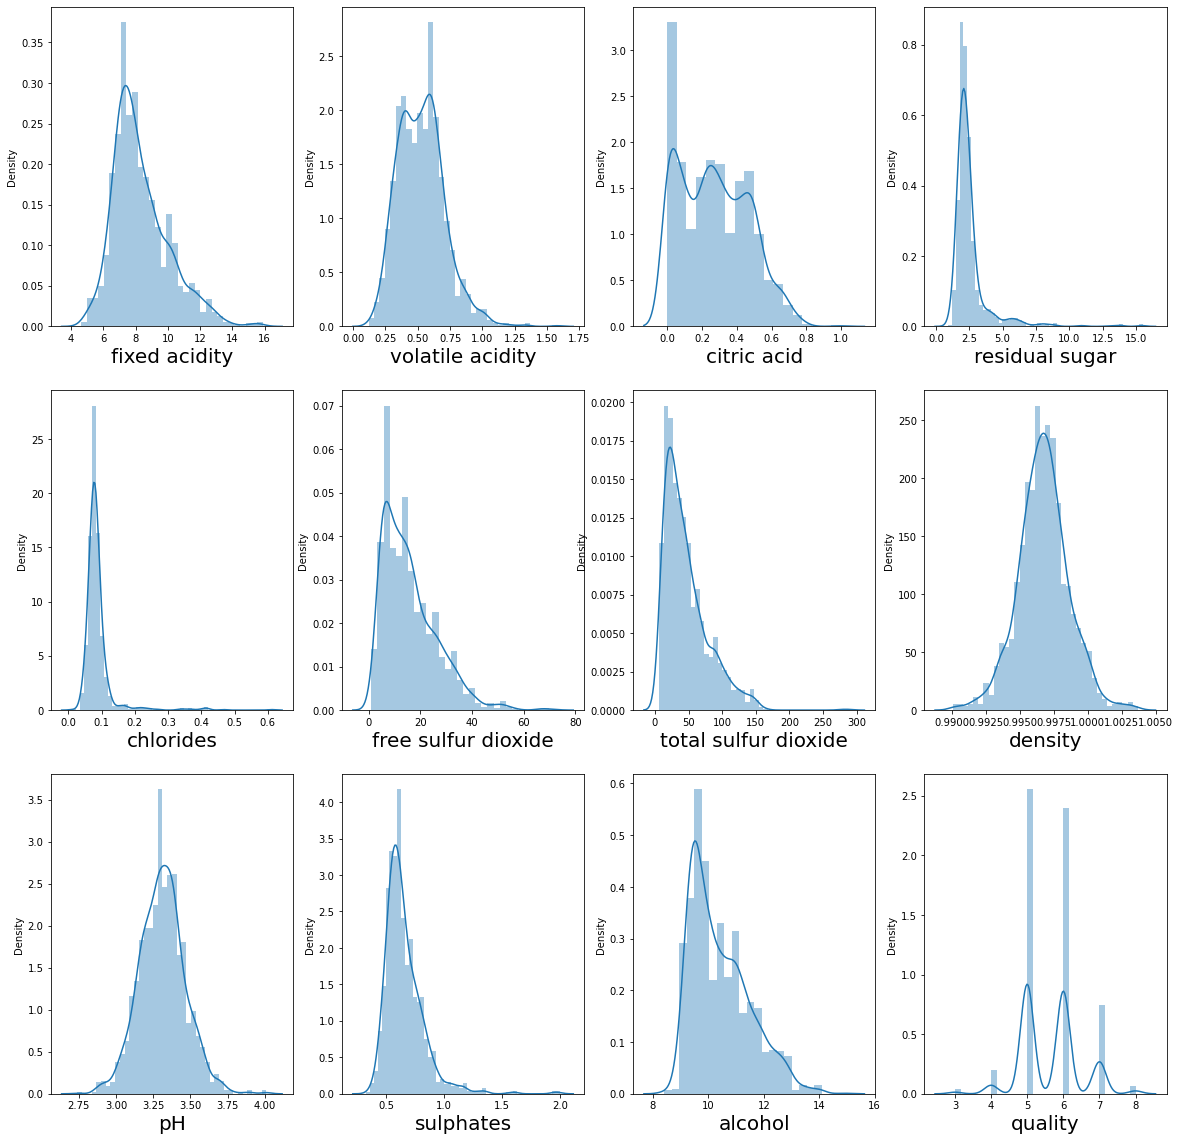

In [9]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Replacing zero value 

In [10]:
data['citric acid']=data['citric acid'].replace(0,data['citric acid'].mean())

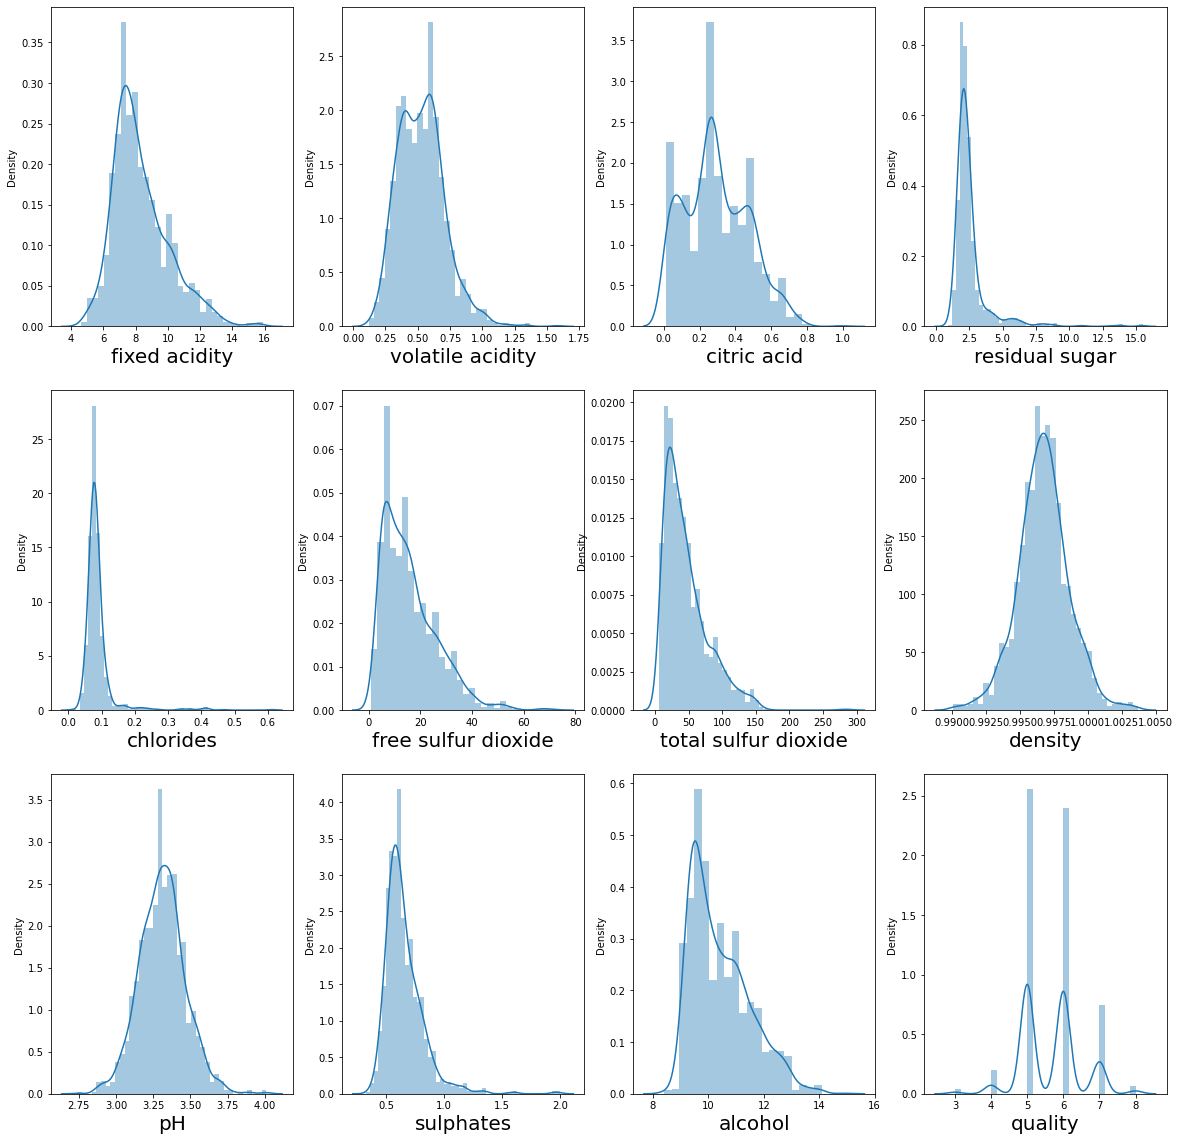

In [11]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [12]:
data.rename(columns={'fixed acidity':'FixedAcidity','volatile acidity':'VolatileAcidity','citric acid':'CitricAcid','residual sugar':'ResidualSugar','free sulfur dioxide':'FreeSulfurDioxide','total sulfur dioxide':'TotalSulfurDioxide'},inplace=True)

Now we have dealt with the 0 values but there are still outliers present in some columns let's deal with them

In [13]:
df_features=data.drop('quality',axis=1)

In [14]:
df_features

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,chlorides,FreeSulfurDioxide,TotalSulfurDioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### vizualize the outliers using boxplot

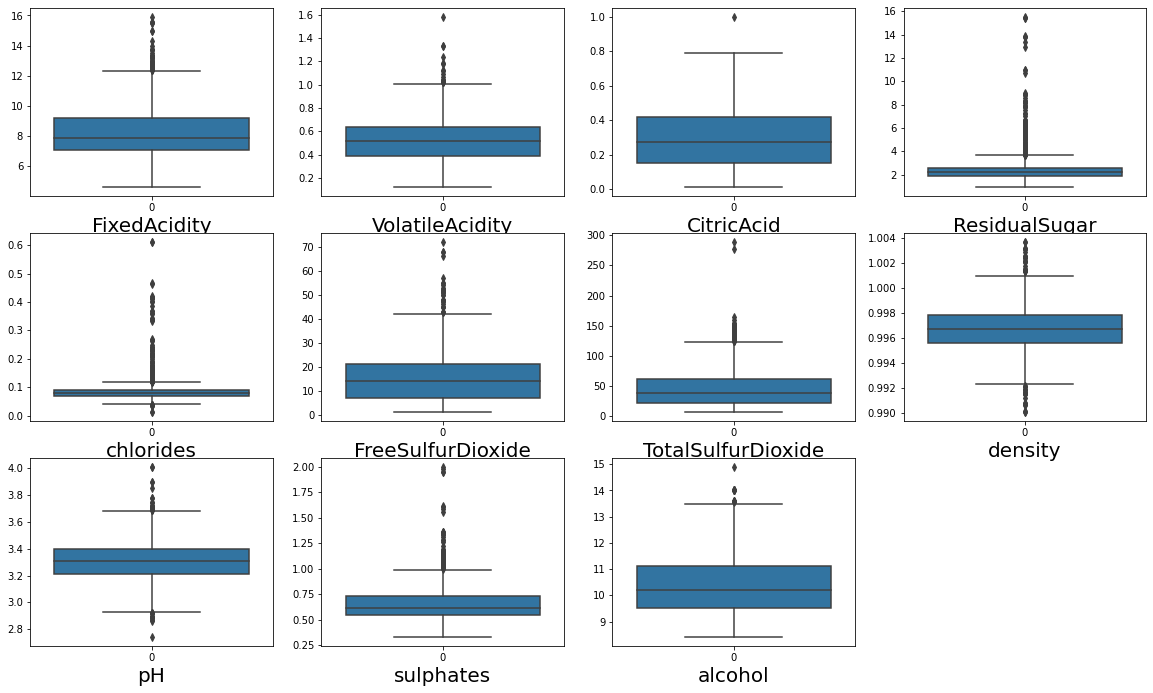

In [15]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df_features:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data=df_features[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Checking Correlation

In [16]:
data.corr().abs()['quality']


FixedAcidity          0.124052
VolatileAcidity       0.390558
CitricAcid            0.213425
ResidualSugar         0.013732
chlorides             0.128907
FreeSulfurDioxide     0.050656
TotalSulfurDioxide    0.185100
density               0.174919
pH                    0.057731
sulphates             0.251397
alcohol               0.476166
quality               1.000000
Name: quality, dtype: float64

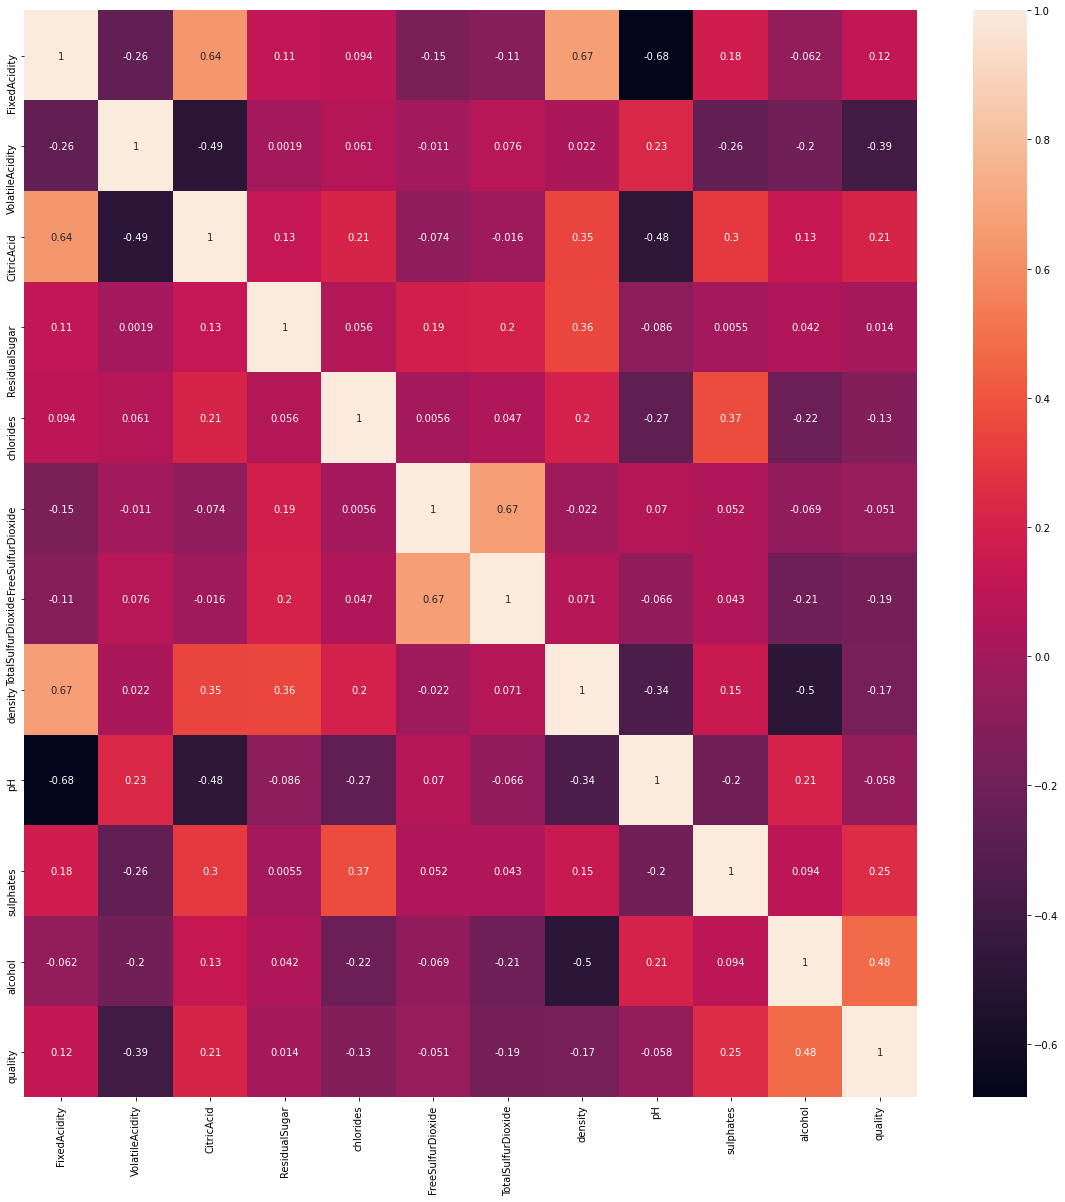

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

removing columns as they have very less relationship with target variable

In [18]:
data=data.drop(['ResidualSugar','FreeSulfurDioxide','pH'],axis=1)


In [19]:
data


,FixedAcidity,VolatileAcidity,CitricAcid,chlorides,TotalSulfurDioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.270976,0.076,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.270976,0.098,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.040000,0.092,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.560000,0.075,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.270976,0.076,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.080000,0.090,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.100000,0.062,51.0,0.99512,0.76,11.2,6
1596,6.3,0.510,0.130000,0.076,40.0,0.99574,0.75,11.0,6
1597,5.9,0.645,0.120000,0.075,44.0,0.99547,0.71,10.2,5


### Removing Outliers

Z-Score Technique

In [20]:
from scipy.stats import zscore

In [21]:
z=np.abs(zscore(data))
z.shape

(1599, 9)

In [22]:
print(np.where(z>3))   # setting threshold=3

(array([  13,   15,   17,   17,   19,   38,   42,   43,   81,   81,   83,
         86,   88,   91,   92,  106,  106,  109,  120,  126,  127,  142,
        144,  147,  151,  151,  151,  169,  169,  181,  199,  226,  226,
        240,  243,  244,  258,  258,  281,  291,  339,  340,  347,  354,
        374,  381,  391,  442,  442,  451,  459,  467,  480,  515,  517,
        544,  554,  554,  555,  555,  557,  557,  568,  588,  591,  608,
        614,  636,  639,  649,  651,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  723,  724,  730,  754,  776,  777,  795,  821,
        832,  836,  837,  889,  899, 1017, 1018, 1051, 1051, 1079, 1081,
       1114, 1165, 1244, 1260, 1269, 1269, 1270, 1270, 1288, 1289, 1299,
       1299, 1312, 1319, 1319, 1367, 1370, 1370, 1372, 1372, 1374, 1374,
       1434, 1435, 1469, 1474, 1476, 1478, 1493, 1496, 1505, 1558, 1570],
      dtype=int64), array([6, 4, 3, 6, 3, 1, 3, 6, 3, 6, 3, 6, 6, 6, 6, 3, 6, 4, 1, 1, 1, 7,
       7, 3, 2, 3, 6, 3, 6, 3

In [23]:
data_new=data[(z<3).all(axis=1)]

In [24]:
data_new.shape

(1491, 9)

In [25]:
data_new

,FixedAcidity,VolatileAcidity,CitricAcid,chlorides,TotalSulfurDioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.270976,0.076,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.270976,0.098,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.040000,0.092,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.560000,0.075,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.270976,0.076,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.080000,0.090,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.100000,0.062,51.0,0.99512,0.76,11.2,6
1596,6.3,0.510,0.130000,0.076,40.0,0.99574,0.75,11.0,6
1597,5.9,0.645,0.120000,0.075,44.0,0.99547,0.71,10.2,5


### Dividing the Dataset into dependent and independent variable

In [26]:
x=data_new.drop(columns='quality')
y=data_new['quality']

In [27]:
x

,FixedAcidity,VolatileAcidity,CitricAcid,chlorides,TotalSulfurDioxide,density,sulphates,alcohol
0,7.4,0.700,0.270976,0.076,34.0,0.99780,0.56,9.4
1,7.8,0.880,0.270976,0.098,67.0,0.99680,0.68,9.8
2,7.8,0.760,0.040000,0.092,54.0,0.99700,0.65,9.8
3,11.2,0.280,0.560000,0.075,60.0,0.99800,0.58,9.8
4,7.4,0.700,0.270976,0.076,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.080000,0.090,44.0,0.99490,0.58,10.5
1595,5.9,0.550,0.100000,0.062,51.0,0.99512,0.76,11.2
1596,6.3,0.510,0.130000,0.076,40.0,0.99574,0.75,11.0
1597,5.9,0.645,0.120000,0.075,44.0,0.99547,0.71,10.2


In [28]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1491, dtype: int64

In [29]:
list(y)

[5,
 5,
 5,
 6,
 5,
 5,
 5,
 7,
 7,
 5,
 5,
 5,
 5,
 5,
 7,
 4,
 6,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 5,
 6,
 5,
 6,
 5,
 6,
 6,
 7,
 5,
 5,
 4,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 5,
 5,
 4,
 5,
 5,
 5,
 6,
 5,
 4,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 4,
 6,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 7,
 5,
 5,
 5,
 5,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 4,
 6,
 5,
 5,
 5,
 5,
 4,
 6,
 4,
 6,
 6,
 6,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 6,
 7,
 7,
 5,
 5,
 5,
 6,
 7,
 7,
 5,
 5,
 7,
 6,
 6,
 6,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 6,
 4,
 6,
 5,
 6,
 5,
 7,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 6,
 6,
 6,
 6,
 5,
 5,
 6,
 5,
 5,
 5,
 7,
 5,
 4,
 5,
 5,
 5,
 7,
 4,
 8,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 6,
 6,
 6,
 8,
 7,


### Converting the values of quality into 1 or good and 0 or not good

In [30]:
y_new=[]
for i in y:
    if i>=7:
        y_new.append(1)
    else:
        y_new.append(0)


In [31]:
y_new

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,


In [32]:
y=y_new

In [33]:
y=pd.Series(y)

In [34]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1486    0
1487    0
1488    0
1489    0
1490    0
Length: 1491, dtype: int64

In [35]:
x.skew().sort_values()

density               0.045324
CitricAcid            0.309044
VolatileAcidity       0.358966
alcohol               0.757600
FixedAcidity          0.800618
sulphates             0.887495
TotalSulfurDioxide    1.137702
chlorides             2.217985
dtype: float64

### Transform data to remove skewness

In [36]:
from sklearn.preprocessing import power_transform

In [37]:
x_new=power_transform(x)

In [38]:
x_new

array([[-0.44430165,  1.05095115, -0.00581472, ...,  0.6274633 ,
        -0.58429381, -1.11536381],
       [-0.15558965,  1.92345186, -0.00581472, ...,  0.05536257,
         0.45650393, -0.52861028],
       [-0.15558965,  1.35457145, -1.53650333, ...,  0.17015639,
         0.22513853, -0.52861028],
       ...,
       [-1.38631167, -0.0102113 , -0.89462919, ..., -0.55618257,
         0.93495168,  0.73615897],
       [-1.79659369,  0.76018955, -0.96279792, ..., -0.71280091,
         0.67145254, -0.03550379],
       [-1.68999893, -1.33212698,  1.06172528, ..., -0.7011877 ,
         0.30417879,  0.73615897]])

In [39]:
sc=StandardScaler()
x_new=sc.fit_transform(x_new)
x_new

array([[-0.44430165,  1.05095115, -0.00581472, ...,  0.6274633 ,
        -0.58429381, -1.11536381],
       [-0.15558965,  1.92345186, -0.00581472, ...,  0.05536257,
         0.45650393, -0.52861028],
       [-0.15558965,  1.35457145, -1.53650333, ...,  0.17015639,
         0.22513853, -0.52861028],
       ...,
       [-1.38631167, -0.0102113 , -0.89462919, ..., -0.55618257,
         0.93495168,  0.73615897],
       [-1.79659369,  0.76018955, -0.96279792, ..., -0.71280091,
         0.67145254, -0.03550379],
       [-1.68999893, -1.33212698,  1.06172528, ..., -0.7011877 ,
         0.30417879,  0.73615897]])

### Checking Multicolinearity using VIF(variance inflation factor)

In [40]:
vif=pd.DataFrame()

In [41]:
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]

In [42]:
vif['features']=x.columns

In [43]:
vif

,vif,features
0,2.824752,FixedAcidity
1,1.673551,VolatileAcidity
2,2.209457,CitricAcid
3,1.245800,chlorides
4,1.141109,TotalSulfurDioxide
5,3.061828,density
6,1.321670,sulphates
7,1.764989,alcohol


All the VIF values are less than 5 and are very low.That means no multicollinearity.

### Finding the best random state

In [44]:
maxAccu=0 #maximum accuracy
maxRS=0  # best random state value for which max accuracy is achieved
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Max Accuracy is',maxAccu,'on Random State ',maxRS)

Max Accuracy is 0.9249329758713136 on Random State  581


### Splitting data Into Training and test data

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=581)


### Logistic Regression

In [46]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

92.49329758713137
[[310  21]
 [ 38   4]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       331
           1       0.16      0.10      0.12        42

    accuracy                           0.84       373
   macro avg       0.53      0.52      0.52       373
weighted avg       0.81      0.84      0.82       373



### Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred=DT.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  89.27613941018767
[[309  22]
 [ 18  24]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       331
           1       0.52      0.57      0.55        42

    accuracy                           0.89       373
   macro avg       0.73      0.75      0.74       373
weighted avg       0.90      0.89      0.89       373



### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  93.2975871313673
[[326   5]
 [ 20  22]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       331
           1       0.81      0.52      0.64        42

    accuracy                           0.93       373
   macro avg       0.88      0.75      0.80       373
weighted avg       0.93      0.93      0.93       373



### SVC

In [49]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  91.95710455764075
[[325   6]
 [ 24  18]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       331
           1       0.75      0.43      0.55        42

    accuracy                           0.92       373
   macro avg       0.84      0.71      0.75       373
weighted avg       0.91      0.92      0.91       373



Logistic Regression ,Random Forest and SVC are producing good accuracy. Now we will check for cross validation score as well for overfitting

### Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score

In [53]:
cvs_LR=cross_val_score(LR,x_new,y,cv=5)

In [55]:
print("Cross Validation score for Logistic Regresiion is ",cvs_LR.mean())

Cross Validation score for Logistic Regresiion is  0.8759219770599987


In [56]:
cvs_DT=cross_val_score(DT,x_new,y,cv=5)
print("Cross validation score for Decision tree is ",cvs_DT.mean())

Cross validation score for Decision tree is  0.8309577787255055


In [57]:
cvs_RF=cross_val_score(RF,x_new,y,cv=5)
print("Cross validation score for Random Forest is ",cvs_RF.mean())

Cross validation score for Random Forest is  0.8759129985858903


In [58]:
cvs_SVC=cross_val_score(svc,x_new,y,cv=5)
print("Cross validation score for SVC is ",cvs_SVC.mean())

Cross validation score for SVC is  0.874577450562277


Random Forest is Performing better among all so we will continue with Random forest classifier

### Hyper Parameter Tuning

In [78]:
# Creating parameter list for passing in GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8,9,10,11,12,13,14,15],
            'criterion':['gini','entropy']}

In [79]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train) # Fitting the data in the model
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 14, 'max_features': 'log2'}

In [80]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.9329758713136729

### ROC AUC plot

<function matplotlib.pyplot.show(close=None, block=None)>

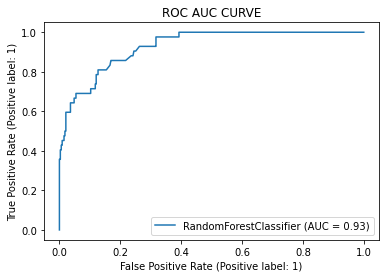

In [82]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show

### Saving the model in pickel

In [85]:
import pickle
filename='winequality_model.pickle'
pickle.dump(GCV.best_estimator_,open(filename,'wb'))